# Exercise 1 (Data processing with R)

The *ozone* dataset contains ground measurements of wind speed, temperature, and other
parameters related to the ozone level between 1998 and 2004.

The dimension is 2536 x 73,
where all the columns whose column names start with "T" represent temperatures averaged hourly
("T.0": average temperature 00:00-00:59, "T.1": average temperature 01:00-01:59, etc.),
and those, whose column names start with "WSR" indicate the wind speed (same naming scheme).

Other columns can be ignored for this exercise.

In [67]:

import pandas
import numpy
import seaborn

from matplotlib import pyplot as plt


## Task 1.A
Load the ozone dataset from the .csv-file as a data frame in R.
Clean the dataset by removing all columns except for "Date", "WSR.0"-"WSR.23" (hourly wind speed measurements) and "T.0"-"T.23" (hourly temperature measurements).

Transform the column "Date" into a Date format.

In [8]:
def load_data(path='data/ozone.csv'):
    df = pandas.read_csv(path)
    
    included_columns  = [ c for c in list(df.columns) if (c.startswith('WSR.') or c.startswith('T.') or c == 'Date') ]
    
    df = df[included_columns]
    df['Date'] = pandas.to_datetime(df.Date)
    
    return df
    
data = load_data()
data

,Date,WSR.0,WSR.1,WSR.2,WSR.3,WSR.4,WSR.5,WSR.6,WSR.7,WSR.8,...,T.14,T.15,T.16,T.17,T.18,T.19,T.20,T.21,T.22,T.23
0,1998-01-01,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15.0
1,1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16.0,16.2
2,1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,22.1,22.2,21.3,19.8,18.6,18.0,18.0,18.2,18.3,18.4
3,1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9
4,1998-01-05,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,25.8,26.0,25.6,24.2,22.9,21.6,20.0,19.5,19.1,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,2004-12-27,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,14.7,14.8,14.2,12.9,11.3,9.9,8.8,7.9,7.3,7.0
2530,2004-12-28,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,18.3,17.6,16.9,15.8,15.4,15.1,15.0,14.8,15.1,15.3
2531,2004-12-29,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,19.9,20.6,20.0,18.9,18.2,18.1,18.5,18.7,18.4,18.2
2532,2004-12-30,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,...,23.6,23.5,22.6,21.8,21.1,20.4,19.8,19.5,19.1,18.7


Plot variables "T.0" and "WSR.0" over all dates and compare them. Is there a trend or seasonality?

<AxesSubplot:xlabel='Date'>

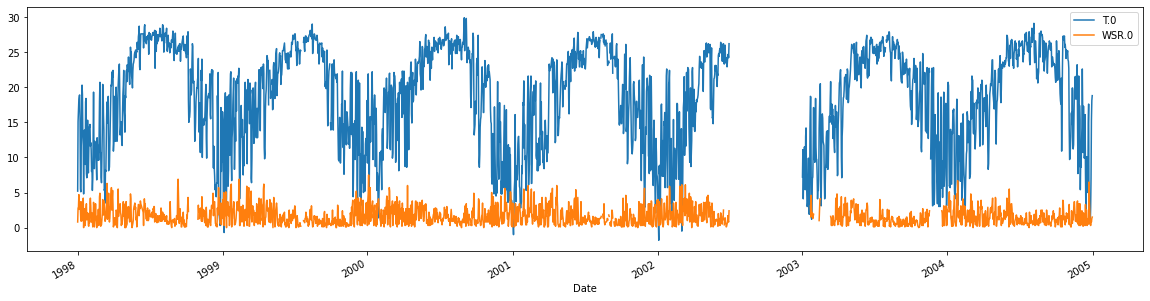

In [12]:
fig, ax = plt.subplots(1, figsize=(20, 5))
data.plot(ax=ax, x='Date', y=['T.0', 'WSR.0'])

There is no appreciable trends in either series.

There is considerable seasonality in `T.0`, with a yearly period.

## Task 1.B
Investigate the dataset for missing values.

Note that some dates are missing entirely — in such cases,
add new rows with the correct dates and NA values for the measurements (no hard-coding!).


In [55]:
data.Date.nunique()

2534

In [60]:
def fill_missing_dates(df):
    dates = pandas.date_range(df.index.min(), df.index.max())
    filled = df.reindex(dates, fill_value=pandas.NA)
    filled.index.name = df.index.name # reindex drops the index name
    return filled
    
data_regular = fill_missing_dates(data.set_index('Date'))
assert data_regular.index.nunique() > data.Date.nunique()

 Finally, make sure that the data frame is sorted correctly (w.r.t. dates).

In [63]:
data_sorted = data_regular.sort_index()
data_sorted

,WSR.0,WSR.1,WSR.2,WSR.3,WSR.4,WSR.5,WSR.6,WSR.7,WSR.8,WSR.9,...,T.14,T.15,T.16,T.17,T.18,T.19,T.20,T.21,T.22,T.23
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15.0
1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16.0,16.2
1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,22.1,22.2,21.3,19.8,18.6,18.0,18.0,18.2,18.3,18.4
1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9
1998-01-05,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,25.8,26.0,25.6,24.2,22.9,21.6,20.0,19.5,19.1,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-12-27,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,14.7,14.8,14.2,12.9,11.3,9.9,8.8,7.9,7.3,7.0
2004-12-28,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,18.3,17.6,16.9,15.8,15.4,15.1,15.0,14.8,15.1,15.3
2004-12-29,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,19.9,20.6,20.0,18.9,18.2,18.1,18.5,18.7,18.4,18.2


Further, write an R-function to remove measurements on 29.02. in leap years and apply it to the data frame.
You can check your code by dividing the number of rows by 365 (the result should be exactly 7).

In [66]:
def remove_leap_days(df):
    is_leap_day = (df.index.day == 29) & (df.index.month == 2)
    out = df[~is_leap_day]
    return out 
    
data_cleaned = remove_leap_days(data_sorted)
assert data_cleaned.shape[0] == 365*7, data_cleaned.shape[0]/365

## Task 1.C

Reshape the dataset from wide to long (use reshape from the stats package - refer to the documentation of the reshape method).

In the end, the data frame should have
one column for dates, one for the time of day, one for wind speed, and one for temperature (see Tab. 1).

The dimension of the resulting data frame should be 61320 x 4.


In [98]:
def convert_to_long(df, prefixes=('WSR', 'T')):
    long = pandas.wide_to_long(df.reset_index(), i='Date', stubnames=prefixes, j='Hour', sep='.')
    
    # Use more human-friendly names
    long = long.rename(columns={'WSR': 'Windspeed', 'T': 'Temperature'})
    return long
    
data_long = convert_to_long(data_cleaned).reset_index()
assert data_long.shape == (61320, 4), data_long.shape
assert 'Temperature' in data_long.columns, data_long.columns
assert 'Windspeed' in data_long.columns, data_long.columns
data_long.head(5)

,Date,Hour,Windspeed,Temperature
0,1998-01-01,0,0.8,5.2
1,1998-01-02,0,2.8,15.1
2,1998-01-03,0,2.9,16.6
3,1998-01-04,0,4.7,18.3
4,1998-01-05,0,2.6,18.8


Finally, create a new column named "DateTime" in POSIXct format, which contains the starting points of the observation intervals (e.g., for the very first entry, "1998-01-01 00:00:00").

In [99]:
def convert_to_datetime(df, name='DateTime'):
    dt = df['Date'] + pandas.to_timedelta(df['Hour'], unit='hour')
    #df = df.drop(columns=['Date', 'Hour']) # remove redundant columns
    df[name] = dt
    df = df.set_index(name)
    return df
    
data_long_dt = convert_to_datetime(data_long)
data_long_dt.head(5)

,Date,Hour,Windspeed,Temperature
DateTime,,,,
1998-01-01,1998-01-01,0,0.8,5.2
1998-01-02,1998-01-02,0,2.8,15.1
1998-01-03,1998-01-03,0,2.9,16.6
1998-01-04,1998-01-04,0,4.7,18.3
1998-01-05,1998-01-05,0,2.6,18.8


## Task 1.D

Compute and plot the time series of

- a) yearly average temperatures (± standard deviation),
- b) yearly median wind speeds (along with minimum and maximum wind speed)

(use dplyr::group_by and dplyr::summarize). NA-values should be ignored.

In [ ]:

data_for_plot = data_long_dt.copy()

def enrich_for_plot(df):
    df = df.copy() # avoid mutating input
    df['Year'] = df.index.Year
    return df

def plot_median_windspeed(ax, df):

fig, ax = plt.subplots(
plot_median_windspeed(data_for_plot)